This is an exploratory data analysis using python for disney+ Movies and TV Shows Dataset.

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

disney = pd.read_csv('disney_plus_titles.csv', sep = ",")

In [7]:
print(disney.head())

  show_id     type                                             title  \
0      s1    Movie  Duck the Halls: A Mickey Mouse Christmas Special   
1      s2    Movie                            Ernest Saves Christmas   
2      s3    Movie                      Ice Age: A Mammoth Christmas   
3      s4    Movie                        The Queen Family Singalong   
4      s5  TV Show                             The Beatles: Get Back   

                            director  \
0  Alonso Ramirez Ramos, Dave Wasson   
1                        John Cherry   
2                       Karen Disher   
3                    Hamish Hamilton   
4                                NaN   

                                                cast        country  \
0  Chris Diamantopoulos, Tony Anselmo, Tress MacN...            NaN   
1           Jim Varney, Noelle Parker, Douglas Seale            NaN   
2  Raymond Albert Romano, John Leguizamo, Denis L...  United States   
3  Darren Criss, Adam Lambert, Derek Hough

In [6]:
print("Shape is: ", disney.shape)
print(disney.info())

Shape is:  (1450, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1450 entries, 0 to 1449
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       1450 non-null   object
 1   type          1450 non-null   object
 2   title         1450 non-null   object
 3   director      977 non-null    object
 4   cast          1260 non-null   object
 5   country       1231 non-null   object
 6   date_added    1447 non-null   object
 7   release_year  1450 non-null   int64 
 8   rating        1447 non-null   object
 9   duration      1450 non-null   object
 10  listed_in     1450 non-null   object
 11  description   1450 non-null   object
dtypes: int64(1), object(11)
memory usage: 136.1+ KB
None


DATA CLEANING

In [8]:
#Check if there is any missing data
print(disney.isnull().sum())

show_id           0
type              0
title             0
director        473
cast            190
country         219
date_added        3
release_year      0
rating            3
duration          0
listed_in         0
description       0
dtype: int64


In [9]:
#show rows containing missing value in rating
print(disney[disney['rating'].isnull()])

    show_id     type                           title            director  \
4        s5  TV Show           The Beatles: Get Back                 NaN   
276    s277    Movie  Disney My Music Story: Perfume  Kentaro Takayanagi   
280    s281  TV Show        Marvel Studios ASSEMBLED                 NaN   

                                                  cast country  \
4    John Lennon, Paul McCartney, George Harrison, ...     NaN   
276                        a-chan , KASHIYUKA , NOCCHi     NaN   
280                                                NaN     NaN   

            date_added  release_year rating  duration  \
4    November 25, 2021          2021    NaN  1 Season   
276     March 19, 2021          2019    NaN    53 min   
280     March 12, 2021          2021    NaN  1 Season   

                            listed_in  \
4       Docuseries, Historical, Music   
276  Biographical, Documentary, Music   
280             Anthology, Docuseries   

                                    

In [10]:

print(disney["rating"].unique())

['TV-G' 'PG' 'TV-PG' nan 'PG-13' 'TV-14' 'G' 'TV-Y7' 'TV-Y' 'TV-Y7-FV']


In [11]:

#UPDATE RATING WHICH IS NULL

disney.loc[4, ["rating"]] = ["PG-13"]
disney.loc[276, ["rating"]] = ["PG-13"]
disney.loc[280, ["rating"]] = ["TV-14"]

In [12]:
#UPDATE NULL TO UNKNOWN

disney["cast"] = disney["cast"].fillna("unknown")
disney["director"] = disney["director"].fillna("unknown")
disney["country"] = disney["country"].fillna("unknown")
disney["date_added"] = disney["date_added"].fillna("unknown")

In [13]:
#RE-CHECK 

print(disney.isnull().sum())

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64


In [14]:
#CHECK THE DUPLICATE

duplicated = disney.duplicated()
print(duplicated.sum())

0


DATA VISUALIZATION

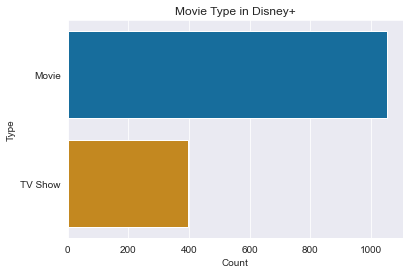

In [15]:
#Type
sns.set_style('darkgrid')
sns.countplot(y='type',data=disney,palette='colorblind')
plt.xlabel('Count')
plt.ylabel('Type')
plt.title('Movie Type in Disney+')
plt.show()

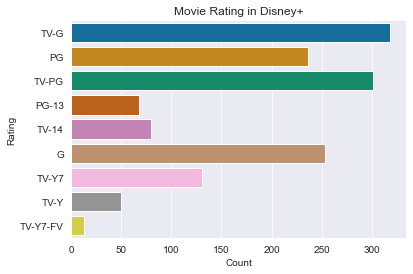

In [16]:
#rating
sns.countplot(y='rating',data=disney,palette='colorblind')
plt.xlabel('Count')
plt.ylabel('Rating')
plt.title('Movie Rating in Disney+')
plt.show()

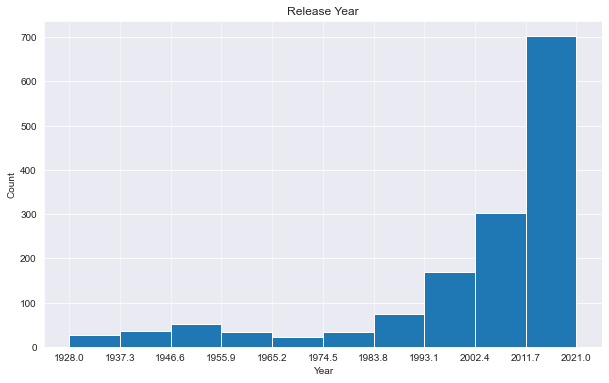

In [17]:
#histogram based on release year
fig = plt.figure(figsize=(10,6))
n, bins, patches = plt.hist(disney['release_year'])

plt.xticks(bins)
plt.grid(axis='x', lw = 0.5)

plt.title('Release Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

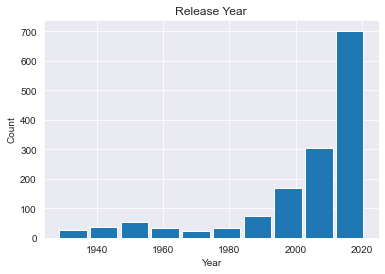

In [18]:
#another histogram style
plt.hist(disney['release_year'], rwidth=0.9)
plt.title('Release Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

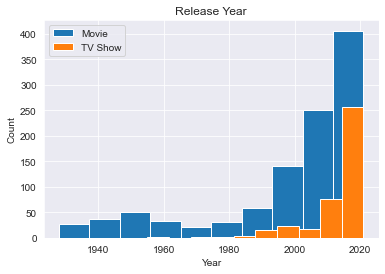

In [19]:
#comparing movies and tv shows

disney_movie = disney[disney['type'] == 'Movie']
disney_tv = disney[disney['type'] == 'TV Show']

plt.hist(disney_movie['release_year'], bins=10, label='Movie')
plt.hist(disney_tv['release_year'], bins=10, label='TV Show')
plt.legend()
plt.title('Release Year')
plt.xlabel('Year')
plt.ylabel('Count')

plt.show()